# lab2 - Set Covering with Evolutionary Algorithms

In [81]:
import logging
import random
from matplotlib import pyplot as plt

from Gene import create_dict_genes
from Individual import Individual
from Genome import Genome

In [82]:
def problem(N, seed=None):
  random.seed(seed)
  return [
    list(set(random.randint(0, N-1) for n in range(random.randint(N//5, N//2))))
    for n in range(random.randint(N, N*5))
  ]

### Global functionalities and parameters

In [83]:
N = 10  # Problem size
POPULATION_SIZE = 5
OFFSPRING_SIZE = 3
NUM_GENERATIONS = 100

In [84]:
def tournament(population):
  x, y = tuple(random.choices(population, k=2))
  return x.fight(y)

In [85]:
def initial_population(id_to_genes):
  population = list()
  genes = list(id_to_genes.values())
  tot_genes = len(id_to_genes)

  for i in range(POPULATION_SIZE):
    genes = random.choices(genes, k=random.randint(1, N))
    population.append(Individual(Genome(genes)))

  return population

## Evolution

In [86]:
def genetic_algorithm(population, id_to_genes):
  fitness_log = [(0, i.fitness) for i in population]

  for g in range(NUM_GENERATIONS):
    offspring = list()
    for i in range(OFFSPRING_SIZE):
      if random.random() < 0.3:
        p = tournament(population)
        o = p.mutate(id_to_genes)
      else:
        p1 = tournament(population)
        p2 = tournament(population)
        o = p1.reproduce(p2, id_to_genes)
      fitness_log.append((g+1, o.fitness))
      offspring.append(o)
    population += offspring
    population = sorted(population, key=lambda i: i.fitness)[:POPULATION_SIZE]

  winner = max(population, key=lambda i: i.fitness)
  return winner, fitness_log

NOTA: bisogna generare solo individui sani (soluzioni buone) -> serve un while not healty nella mutazione!

Quindi se si riproducono poi serve una mutazione che lo renda healty
oppure serve che vengano generati almeno un tot di healty (la prima ha più senso, tipo hill climber)

## Main

In [87]:
logging.getLogger().setLevel(logging.INFO)

In [88]:
# Dictionaries to map genes to ids and vice versa
id_to_genes = create_dict_genes(problem(N, 42))

In [97]:
population = initial_population(id_to_genes)

winner_GA, fitness_log_GA = genetic_algorithm(population, id_to_genes)

logging.info(f"Genetic Algorithm:\n\tcovered={winner_GA.covered};\n\tfitness={winner_GA.fitness}")

INFO:root:Genetic Algorithm:
	covered={1, 7};
	fitness=Cost(n_vals=2, length=-10)


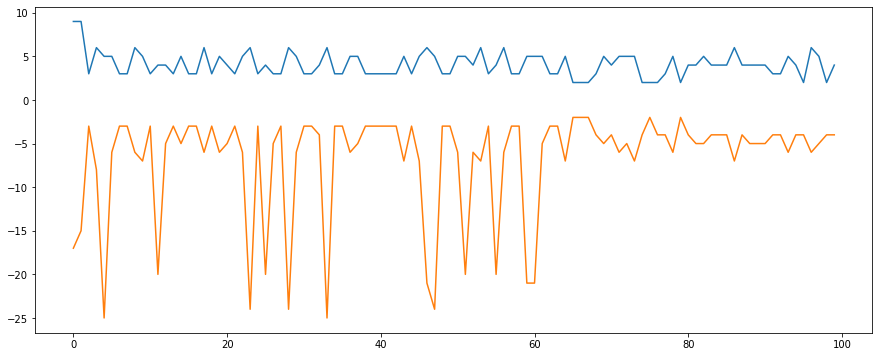

In [95]:
gen_best = [max(f[1] for f in fitness_log_GA if f[0] == x) for x in range(NUM_GENERATIONS)]

plt.figure(figsize=(15, 6))
#plt.scatter([x for x, _ in fitness_log_GA], [y for _, y in fitness_log_GA], marker=".", label='fitness_log')
plt.plot([x for x, _ in enumerate(gen_best)], [y for _, y in enumerate(gen_best)], label='gen_best')